# titanic

* 1주차 과제 때 EDA를 진행했으므로 결측치를 중심으로 조금 더 탐색한 후 모델로 넘어가겠습니다.

# EDA

In [117]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

%pip install koreanize-matplotlib
import koreanize_matplotlib

In [118]:
data = pd.read_csv("Titanic-Dataset.csv")

* PassengerId : 승객 id
* Survived : 생존 유무, 0 = No, 1 = Yes
* Pclass : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
* Name	
* Sex	
* Age	
* SibSp	: # of siblings / spouses aboard the Titanic	
* Parch	: # of parents / children aboard the Titanic	
* Ticket : Ticket number
* Fare : Passenger fare 요금
* Cabin	: Cabin number 객실 번호
* Embarked : Port of Embarkation 출항지

In [119]:
df = data.copy()

print(df.shape)
print(df.head())
print(df.tail())
print(df.info())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [120]:
df.isnull().sum()
# AGE, Cabin, Embarked에서 결측치

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Embarked의 결측치

Embarked의 종류는 3가지 뿐이므로 다른 변수를 통해 결측치의 값을 추론해보도록하고 못찾으면 행을 삭제하는 방향으로 진행 

In [123]:
df[df["Embarked"].isnull()]

# 둘다 살아남았고, 성별은 같지만 나이차이는 24세, Ticket Fare Cabin이 모두 같음 
# 추측 : 성이 다르기 때문에 결혼한 딸을 둔 모녀 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [124]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='count', ylabel='Embarked'>

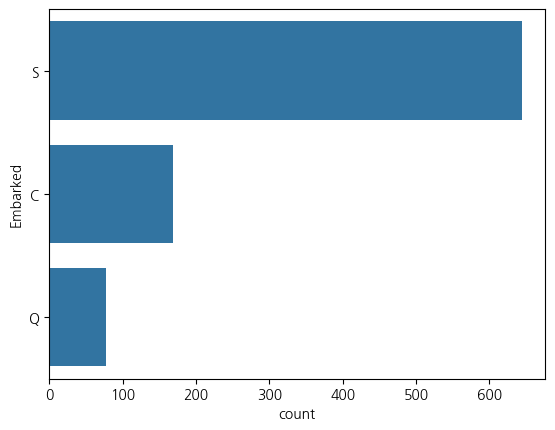

In [125]:
sns.countplot(df["Embarked"])

### 가족끼리 LastName이 같은 점을 이용해서 이름이 같은 사람이 있는지 찾아보기 

In [126]:
df[df["Embarked"].isnull()]

# 이름의 형식 : [성], [호칭 miss mr 등] [이름] ([결혼 전 이름])
# 따라서,
# 61행은 성 = Icard, 이름 = Amelie 인 미혼 여성
# 829행은 성 = Stone, 이름 = George Nelson 인 기혼 여성, 혼전 이름은 Martha Evelyn
# 그러므로 둘이 모녀라는 추측은 틀림

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [127]:
df[df['Name'].str.contains('Icard', case=False, na=False)]  #없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [128]:
df[df['Name'].str.contains('Evelyn', case=False, na=False)]  #없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [129]:
df[df['Name'].str.contains('Stone', case=False, na=False)]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5,E34,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [130]:
# 이름이 짤려서 다시 출력 ㅜ 
df.iloc[319]["Name"]  # 319
# 가족일 가능성이 있으나 Stone이 흔한 성이라 우선 보류 

'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)'

### Cabin을 같이 쓴 사람 찾기

In [131]:
df[df["Cabin"] == "B28"]  # 없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Fare 같은 사람 찾기

전제 : 항구에 따른 가격 차이가 있을 것임

In [132]:
df[df["Fare"] == 80.0]  # 없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### ticket 같은 사람 찾기

In [133]:
df[df["Ticket"] == "113572"]  # 없음.. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 결론 : Pclass로 나누자 예측하자

In [134]:
tmp = df.groupby(["Pclass", "Embarked"])["PassengerId"].agg(["count"]); tmp

count
Pclass Embarked       
1      C            85
       Q             2
       S           127
2      C            17
       Q             3
       S           164
3      C            66
       Q            72
       S           353

In [135]:
df.groupby(["Embarked", "Sex"])["PassengerId"].agg(["count"])  # 참고 

count
Embarked Sex          
C        female     73
         male       95
Q        female     36
         male       41
S        female    203
         male      441

<Axes: xlabel='Pclass,Embarked'>

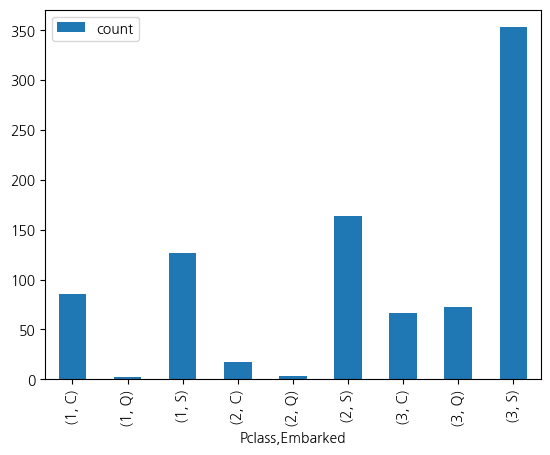

In [136]:
tmp.plot.bar()

In [137]:
# 결측치에는 "S"로 채우기로 결정

df["Embarked"].fillna("S", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2072\2104171287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S", inplace=True)


In [138]:
# 확인
df["Embarked"].isna().sum()

0

In [139]:
df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

## Age의 결측치

In [140]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### 회귀 모델을 이용하여 나이 예측하기 

In [141]:
df.columns

# target = age
# input = 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
df1 = df.copy()
df1 = df1.dropna(subset=['Age'])

In [143]:
target = df1["Age"]
input = df1.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']]

In [144]:
input.info()
# 성별과 항구를 수치형으로 바꿔야함 

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   Embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [145]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
input['Sex'] = encoder.fit_transform(input['Sex'])

print(input.head(5))  # 확인 

   Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0         0       3    1      1      0   7.2500        S
1         1       1    0      1      0  71.2833        C
2         1       3    0      0      0   7.9250        S
3         1       1    0      1      0  53.1000        S
4         0       3    1      0      0   8.0500        S


In [146]:
encoder = LabelEncoder()
input["Embarked"] = encoder.fit_transform(input['Embarked'])

print(input.head(10)) # 확인 

    Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked
0          0       3    1      1      0   7.2500         2
1          1       1    0      1      0  71.2833         0
2          1       3    0      0      0   7.9250         2
3          1       1    0      1      0  53.1000         2
4          0       3    1      0      0   8.0500         2
6          0       1    1      0      0  51.8625         2
7          0       3    1      3      1  21.0750         2
8          1       3    0      0      2  11.1333         2
9          1       2    0      1      0  30.0708         0
10         1       3    0      1      1  16.7000         2


In [147]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target)

In [148]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

age_pipe = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    ElasticNet()
)

In [149]:
from sklearn.model_selection import GridSearchCV

hyperparam = {'elasticnet__alpha' : (0.001, 0.005, 0.01,0.5, 0.1, 0.5, 1, 5)}  # 클수록 강도가 강해짐짐
grid_model = GridSearchCV(
    age_pipe, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)

grid_model.fit(train_input, train_target)
age_model = grid_model.best_estimator_
age_model

#alpha가 0.1일때 제일 좋다.

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.5))])

In [150]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 평가하는 함수
def eval_regression(model):
    train_pred = model.predict(train_input)
    test_pred = model.predict(test_input)
    print('학습 능력')
    print('R Square : ', r2_score(train_target, train_pred))
    print('MSE : ', mean_squared_error(train_target, train_pred))
    print('MAE : ', mean_absolute_error(train_target, train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(test_target, test_pred))
    print('MSE : ', mean_squared_error(test_target, test_pred))
    print('MAE : ', mean_absolute_error(test_target, test_pred))

In [151]:
eval_regression(age_model)

학습 능력
R Square :  0.2884716537320169
MSE :  146.58896654312198
MAE :  9.587210256197404
일반화 능력
R Square :  0.3313411650080438
MSE :  150.13268781242894
MAE :  9.655305997731425


In [152]:
# 파이프라인 X, 규제 X
from sklearn.metrics import mean_absolute_error

poly = PolynomialFeatures()

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()

lr.fit(train_poly, train_target)

train_pred = lr.predict(train_poly)
test_pred = lr.predict(test_poly)

print(lr.score(train_poly, train_target))
print('MAE : ', mean_absolute_error(train_target, train_pred))
print(lr.score(test_poly, test_target))
print('MAE : ', mean_absolute_error(test_target, test_pred))

# 최악..

0.21746754834302895
MAE :  9.994299312983717
0.016584811034206726
MAE :  10.996742291157473


결론 : 데이터의 변수인 Age를 예측하는 age_model의 성능이 좋지 않게 나와서.. 다른 모델 사용해보기..

### 랜덤포레스트 이용해서 Age 예측하기

In [153]:
df1 = df.copy()
df1 = df1.dropna(subset=['Age'])
target = df1["Age"]
input = df1.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']]
encoder = LabelEncoder()
input['Sex'] = encoder.fit_transform(input['Sex'])
input["Embarked"] = encoder.fit_transform(input['Embarked'])
print(input.head(10)) # 확인

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target)

    Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked
0          0       3    1      1      0   7.2500         2
1          1       1    0      1      0  71.2833         0
2          1       3    0      0      0   7.9250         2
3          1       1    0      1      0  53.1000         2
4          0       3    1      0      0   8.0500         2
6          0       1    1      0      0  51.8625         2
7          0       3    1      3      1  21.0750         2
8          1       3    0      0      2  11.1333         2
9          1       2    0      1      0  30.0708         0
10         1       3    0      1      1  16.7000         2


In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_input, train_target)

train_pred = rf_regressor.predict(train_input)
test_pred = rf_regressor.predict(test_input)

print('학습 능력')
print('R Square : ', r2_score(train_target, train_pred))
print('MSE : ', mean_squared_error(train_target, train_pred))
print('MAE : ', mean_absolute_error(train_target, train_pred))
print('일반화 능력')
print('R Square : ', r2_score(test_target, test_pred))
print('MSE : ', mean_squared_error(test_target, test_pred))
print('MAE : ', mean_absolute_error(test_target, test_pred))

학습 능력
R Square :  0.7469554015470523
MSE :  52.83894939593118
MAE :  5.264752612245266
일반화 능력
R Square :  0.2880498996113846
MSE :  153.99333928937696
MAE :  9.561199403731825


### 다중회귀가 최선이라.. 그거로 결측치 채우기 

이유 : 회귀모델은 과적합이 적고 일반화 성능이 안정적임 그러나 랜덤포레스트는 학습 데이터에서는 좋지만 Test에서 크게 성능 저하됨.

In [155]:
df_null = df[df["Age"].isnull()]
X = df_null.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Label Encoding 적용 (기존에 사용한 encoder 활용)
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

# 최적화된 age_model을 사용해 결측치 예측
df.loc[df["Age"].isnull(), "Age"] = age_model.predict(X)

In [156]:
# 확인
df["Age"].isnull().sum()

0

In [157]:
df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                   28.700231
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

## Cabin의 결측치

In [161]:
print(df["Cabin"].isnull().sum() / df.shape[0] * 100)

# 결측치의 비율이 77프로 -> 열 삭제 

77.10437710437711


In [ ]:
df = df.drop(columns="Cabin")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 생존 예측에 대한 모델

In [ ]:
# 데이터 셋 분리
input = df.drop(columns=["Survived", "PassengerId", "Name"])
target = df["Survived"]

# input.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [170]:
# Sex, Ticket, Embarked 를 수치형 변수로 바꾸기

encoder = LabelEncoder()
input['Sex'] = encoder.fit_transform(input['Sex'])
input['Embarked'] = encoder.fit_transform(input['Embarked'])
input['Ticket'] = encoder.fit_transform(input['Ticket'])

input.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2


In [172]:
train_input, test_input, train_target, test_target = train_test_split(input, target)

## 랜덤포레스트 모델

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_input, train_target)

train_pred = rf_regressor.predict(train_input)
test_pred = rf_regressor.predict(test_input)

print('학습 능력')
print('R Square : ', r2_score(train_target, train_pred))
print('MSE : ', mean_squared_error(train_target, train_pred))
print('MAE : ', mean_absolute_error(train_target, train_pred))
print('일반화 능력')
print('R Square : ', r2_score(test_target, test_pred))
print('MSE : ', mean_squared_error(test_target, test_pred))
print('MAE : ', mean_absolute_error(test_target, test_pred))


학습 능력
R Square :  0.9290835162945341
MSE :  0.016634281437125746
MAE :  0.08163173652694611
일반화 능력
R Square :  0.47273458208458186
MSE :  0.12736053811659193
MAE :  0.23345291479820626


## 회귀 모델

### 선형회귀모델

In [175]:
lr = LinearRegression()

lr.fit(train_input, train_target)
eval_regression(lr)

# 과적합은 없지만 R^2이 좀 더 개선되어야함 

학습 능력
R Square :  0.3974306749729699
MSE :  0.1413396041956599
MAE :  0.29063065038240005
일반화 능력
R Square :  0.42001880877928677
MSE :  0.14009399080904913
MAE :  0.28912334229289954


### 다항회귀 + 선형회귀

In [176]:
model2 = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)
model2.fit(train_input, train_target)
eval_regression(model2)

# 여전히 낮은 R^2

학습 능력
R Square :  0.33584799407228505
MSE :  0.15578453423490474
MAE :  0.29682987680781386
일반화 능력
R Square :  0.3724789954062844
MSE :  0.1515771945379901
MAE :  0.29826784441289345


### 다항회귀 + 스케일 + 릿지

In [230]:
from sklearn.linear_model import Ridge

pipe1 = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge()
)

hyperparam = {'ridge__alpha' : (0.1, 1, 1.5, 5, 10,50,100)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model3 = grid_model.best_estimator_
model3


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100))])

In [231]:
eval_regression(model3)

학습 능력
R Square :  0.4303193602894597
MSE :  0.13362518268085785
MAE :  0.285698958495574
일반화 능력
R Square :  0.4521852664307888
MSE :  0.13232420880438706
MAE :  0.28658541178583113


### 다항회귀 + 스케일 + 라쏘 

In [202]:
from sklearn.linear_model import Lasso

pipe1 = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Lasso()
)

hyperparam = {'lasso__alpha' : (0.001, 0.005, 0.01, 0.05,0.1, 1, 1.5)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model4 = grid_model.best_estimator_
model4

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [196]:
eval_regression(model4)

학습 능력
R Square :  0.41705890257384703
MSE :  0.1367355764017694
MAE :  0.2889343501553214
일반화 능력
R Square :  0.44688015188042807
MSE :  0.13360565496214072
MAE :  0.2854954980547289


### 다항회귀 + 스케일 + 엘라스틱네트 

In [199]:
from sklearn.linear_model import ElasticNet

pipe1 = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    ElasticNet()
)

hyperparam = {'elasticnet__alpha' : (0.001, 0.005, 0.1, 1, 1.5)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model5 = grid_model.best_estimator_
model5


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.005))])

In [200]:
eval_regression(model4)

학습 능력
R Square :  0.365130831202907
MSE :  0.14891590611550548
MAE :  0.3314666491934694
일반화 능력
R Square :  0.37868382556642644
MSE :  0.15007842279748404
MAE :  0.33399949002939405


### 스케일 + 릿지

In [205]:
from sklearn.linear_model import Ridge

pipe1 = make_pipeline(
    StandardScaler(),
    Ridge()
)

hyperparam = {'ridge__alpha' : (0.1, 1, 1.5, 5, 10,50,100)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model6 = grid_model.best_estimator_
model6


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

In [206]:
eval_regression(model6)

학습 능력
R Square :  0.3973213428399358
MSE :  0.14136524931194294
MAE :  0.2920341044411743
일반화 능력
R Square :  0.41942569644088534
MSE :  0.14023725661791075
MAE :  0.29054059476466676


In [ ]:
df_coef = pd.DataFrame()
df_coef['Coef'] = model6['ridge'].coef_
df_coef['X'] = input.columns
px.bar(df_coef, x='X', y='Coef')

### 스케일 + 라쏘

In [212]:
from sklearn.linear_model import Lasso

pipe1 = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Lasso()
)

hyperparam = {'lasso__alpha' : (0.001, 0.005, 0.01, 0.05,0.1, 1, 1.5)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model7 = grid_model.best_estimator_
model7

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [213]:
eval_regression(model7)

학습 능력
R Square :  0.41705890257384703
MSE :  0.1367355764017694
MAE :  0.2889343501553214
일반화 능력
R Square :  0.44688015188042807
MSE :  0.13360565496214072
MAE :  0.2854954980547289


## k-이웃

### KNeighborsClassifier

In [219]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

eval_regression(kn)

학습 능력
R Square :  0.1830854041866108
MSE :  0.19161676646706588
MAE :  0.19161676646706588
일반화 능력
R Square :  -0.16958041958042003
MSE :  0.2825112107623318
MAE :  0.2825112107623318


In [221]:
# ticket이 큰 관련성이 없을까? 

train_input1 = train_input.drop(columns="Ticket")
test_input1 = test_input.drop(columns="Ticket")

test_input1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
570,2,1,62.000000,0,0,10.5000,2
660,1,1,50.000000,2,0,133.6500,2
649,3,0,23.000000,0,0,7.5500,2
792,3,0,-9.509268,8,2,69.5500,2
391,3,1,21.000000,0,0,7.7958,2
...,...,...,...,...,...,...,...
224,1,1,38.000000,1,0,90.0000,2
561,3,1,40.000000,0,0,7.8958,2
467,1,1,56.000000,0,0,26.5500,2
539,1,0,22.000000,0,2,49.5000,0


In [222]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input1, train_target)

kn.score(test_input1, test_target)

# 제일 높은 정확도도.....

0.695067264573991

In [ ]:
train_pred = kn.predict(train_input1)
test_pred = kn.predict(test_input1)

print('학습 능력')
print('R Square : ', r2_score(train_target, train_pred))
print('MSE : ', mean_squared_error(train_target, train_pred))
print('MAE : ', mean_absolute_error(train_target, train_pred))
print('일반화 능력')
print('R Square : ', r2_score(test_target, test_pred))
print('MSE : ', mean_squared_error(test_target, test_pred))
print('MAE : ', mean_absolute_error(test_target, test_pred))

# 그러나 매우 낮은 R^2

학습 능력
R Square :  0.16393896834723443
MSE :  0.19610778443113772
MAE :  0.19610778443113772
일반화 능력
R Square :  -0.26240426240426284
MSE :  0.30493273542600896
MAE :  0.30493273542600896


### KNeighborsRegressor

In [228]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

# 제일 높은 정확도도.....

0.11780219780219736

In [229]:
eval_regression(knr)

# 최악최악 

학습 능력
R Square :  0.4146296349374682
MSE :  0.1373053892215569
MAE :  0.28053892215568865
일반화 능력
R Square :  0.11780219780219736
MSE :  0.2130941704035875
MAE :  0.3605381165919283


# 결론

제가 찾은 모델 중 가장 과적합이 없고 R^2이 높았던 모델은 model3 = 다항회귀 + 스케일 + 릿지 입니다.
모델의 예측력이 너무 낮은데 어떻게 개선해야할지 잘 모르겠습니다...
죄송합니다 

In [232]:
from sklearn.linear_model import Ridge

pipe1 = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge()
)

hyperparam = {'ridge__alpha' : (0.1, 1, 1.5, 5, 10,50,100)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model3 = grid_model.best_estimator_
model3

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100))])

In [235]:
eval_regression(model3)

학습 능력
R Square :  0.4303193602894597
MSE :  0.13362518268085785
MAE :  0.285698958495574
일반화 능력
R Square :  0.4521852664307888
MSE :  0.13232420880438706
MAE :  0.28658541178583113
